In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import numpy as np

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# NBER-CES Manufacturing Industry Data

Data Source: NBER-CES Manufacturing Industry Database (1958 to 2011)
https://www.nber.org/research/data/nber-ces-manufacturing-industry-database

In [85]:
df = pd.read_excel(r"Statistical Data/NBER-CES Manufacturing Industry Data/NBER-CES Manufacturing Industry Database (sic5811).xls")

In [86]:
device_sic = [3693, 3841, 3842, 3843, 3851]  # From "Managing the Medical Arms Race"

In [87]:
# Dataframe with target device SIC codes
filt = df["sic"].isin(device_sic)
device_df = df.loc[filt]

# Dataframe without target device SIC codes
other_df = df.loc[~filt]

In [88]:
# Group the dataframes by year
device_years = device_df.groupby(["year"])
other_years = other_df.groupby(["year"])

## Annual Change in Median 5-factor Total Factor Productivity

In [ ]:
# Produce dictionary of data
device_dtfp5 = {"Medical Device Industry":[], "Other Industries":[]}
for i in range(1959, (2011 + 1)): # +1 because ranges are not inclusive of the last value
    device_dtfp5["Medical Device Industry"].append(device_years.get_group(i)["dtfp5"].median())
    device_dtfp5["Other Industries"].append(other_years.get_group(i)["dtfp5"].median())
    
productivity_df = pd.DataFrame.from_dict(device_dtfp5).set_index(pd.Index(list(range(1959, 2012))))

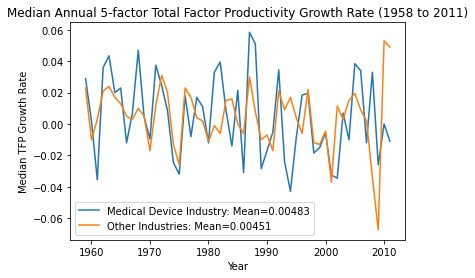

In [ ]:
plt.plot(productivity_df)
    
plt.legend(["Medical Device Industry: Mean={}".format(str(round(productivity_df["Medical Device Industry"].mean(), 5))), 
            "Other Industries: Mean={}".format(str(round(productivity_df["Other Industries"].mean(), 5)))], 
            loc ="lower left")
plt.xlabel("Year")
plt.ylabel("Median TFP Growth Rate")
plt.title("Median Annual 5-factor Total Factor Productivity Growth Rate (1958 to 2011)")
    
ax.tick_params(labelrotation=0)

plt.show()

## Annual Change in Variable Sums

In [ ]:
def plot_function(data_df, title):
    fig, ax = plt.subplots()
    plt.plot(data_df)
    
    plt.legend(["Medical Device Industry Mean: {}%".format(str(round(data_df["Medical Device Industry"].mean(), 2))), 
                "Other Industries Mean: {}%".format(str(round(data_df["Other Industries"].mean(), 2)))], 
               loc ="lower left")
    plt.xlabel("Year")
    plt.ylabel("Percent Change")
    plt.title(title)
    
    ax.tick_params(labelrotation=0)
    
    return(plt.show())

In [ ]:
# Sums given varible for each year in device and non-device SIC codes. Returns DF with year-over-year change.
def find_delta_with_sums(column, device_years_inner=device_years, other_years_inner=other_years, start_year=1958, end_year=2011):
    data_dict = {"Medical Device Industry":[], "Other Industries":[]}
    
    device_list = [device_years_inner.get_group(i)[column].sum() for i in range(start_year, (end_year+1))]  # +1 because ranges are not inclusive of the last value
    other_list = [other_years_inner.get_group(i)[column].sum() for i in range(start_year, (end_year+1))]
    
    for i in range(len(range(start_year, end_year))):
        data_dict["Medical Device Industry"].append(((device_list[i + 1]/device_list[i])-1)*100)  # Previous year divided by current year for ratio
        data_dict["Other Industries"].append(((other_list[i + 1]/other_list[i])-1)*100)
    
    return pd.DataFrame.from_dict(data_dict).set_index(pd.Index(list(range(start_year+1, end_year+1))))

### Employment

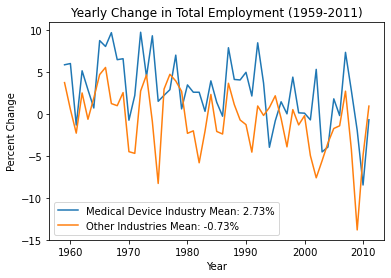

In [ ]:
employment_dict = find_delta_with_sums(column="emp")
plot_function(employment_dict, "Yearly Change in Total Employment (1959-2011)")

### Total Payroll

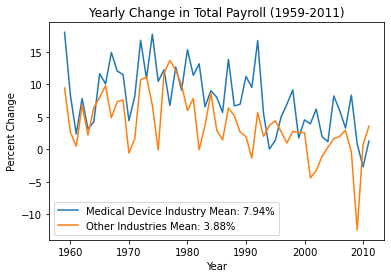

In [ ]:
pay_dict = find_delta_with_sums(column="pay")
plot_function(pay_dict, "Yearly Change in Total Payroll (1959-2011)")

### Material Cost

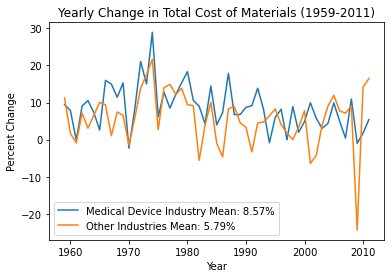

In [ ]:
matcost_dict = find_delta_with_sums(column="matcost")
plot_function(matcost_dict, "Yearly Change in Total Cost of Materials (1959-2011)")

### Value of Shipments

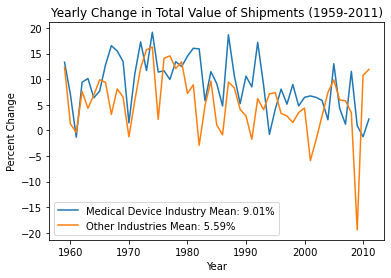

In [ ]:
vship_dict = find_delta_with_sums(column="vship")
plot_function(vship_dict, "Yearly Change in Total Value of Shipments (1959-2011)")

# FDA Device Registration and Lising

PCB Listings: https://www.fda.gov/medical-devices/device-registration-and-listing/establishment-registration-and-medical-device-listing-files-download

Device Premarket Approvals: https://www.fda.gov/medical-devices/device-approvals-denials-and-clearances/pma-approvals#pma

Device 501ks: https://www.fda.gov/medical-devices/510k-clearances/downloadable-510k-files

These files are updated by the FDA frequently. Most recent download: 2021-02-18


"Product Code: 3 character unique product identifier" (https://www.fda.gov/medical-devices/classify-your-medical-device/download-product-code-classification-files). Describes the type of product. List of codes at link.

In [74]:
# For PC
raw_pcd = pd.read_csv("./Statistical Data/FDA Device Registration and Lising/Listing_PCD.txt", sep = "|", 
                      parse_dates=["CREATED_DATE"], date_parser=lambda x: pd.to_datetime(x, format="%m/%d/%Y"))
raw_own_op = pd.read_csv("./Statistical Data/FDA Device Registration and Lising/Owner_Operator.txt", sep="|")
raw_product_code = pd.read_csv("./Statistical Data/FDA Device Registration and Lising/foiclass.txt", sep = "|")
raw_pma = pd.read_csv("./Statistical Data/FDA Device Registration and Lising/pma.txt", sep = "|",
                     parse_dates=["DATERECEIVED", "DECISIONDATE"], date_parser=lambda x: pd.to_datetime(x, format="%m/%d/%Y"))

In [ ]:
# For Google Colab
# raw_pcd = pd.read_csv("/content/Listing_PCD.txt", sep = "|", encoding= "unicode_escape")
# raw_own_op = pd.read_csv("/content/Owner_Operator.txt", sep = "|", encoding= "unicode_escape")
# raw_product_code = pd.read_csv("/content/foiclass.txt", sep = "|", encoding= "unicode_escape")
# raw_pma = pd.read_csv("/content/pma.txt", sep = "|", encoding= "unicode_escape")

In [54]:
def print_device_code_key(code_list, raw_product_code=raw_product_code):
        temp_code = raw_product_code.loc[raw_product_code["PRODUCTCODE"].isin(code_list)]
        pcode = temp_code["PRODUCTCODE"].values
        name = temp_code["DEVICENAME"].values

        name_dict = {}
        for i, code in enumerate(pcode):
            name_dict[code] = name[i]

        for code in code_list:
            print("{}: {}".format(code, name_dict[code]))


## PCD Analysis

### Data Notes

Firms do not always have the same owner operator number

In [ ]:
print(len(own_op["FIRM_NAME"].unique()))
print(len(own_op["OWNER_OPERATOR_NUMBER"].unique()))

38904
39115


### Cleaning and Formatting

In [55]:
# Join Owner Operator to PCD
own_op_nodup = raw_own_op.drop_duplicates(subset=["OWNER_OPERATOR_NUMBER"], keep="last") # Merge own_op duplicates
full_pcd = raw_pcd.join(own_op_nodup.set_index("OWNER_OPERATOR_NUMBER"), on="OWNER_OPERATOR_NUMBER", how="left")

In [60]:
# Remove product codes not associated with a Class 3 device
prod_cod = raw_product_code.loc[raw_product_code["DEVICECLASS"]== "3"][["MEDICALSPECIALTY", "PRODUCTCODE", "DEVICENAME", "Implant_Flag", "Life_Sustain_support_flag"]]
dev_pcd = full_pcd.loc[full_pcd["PRODUCT_CODE"].isin(prod_cod["PRODUCTCODE"])]

### Analysis

**PCD Listing Volume**

In [100]:
def pcd_activity_plot(pcd_df, offset_code, title):
    
    pcd_df.set_index(pcd_df["CREATED_DATE"], inplace=True)
    series = pcd_df.resample(offset_code).agg(lambda x: len(x["key_val"]))  # Series with each day and the number of items on that day
    
    x = series.index
    y = series.values

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Listing Volume")

    plt.scatter(x, y)
    plt.tight_layout()
    plt.show()

In [98]:
dev_pcd.resample("D").agg(lambda x: x.shape[0])

,key_val,PRODUCT_CODE,CREATED_DATE,OWNER_OPERATOR_NUMBER,EXEMPT,REG_KEY,CONTACT_ID,FIRM_NAME
CREATED_DATE,,,,,,,,
1992-07-06,4,4,4,4,4.0,4.0,4.0,4
1992-07-07,0,0,0,0,0.0,0.0,0.0,0
1992-07-08,0,0,0,0,0.0,0.0,0.0,0
1992-07-09,0,0,0,0,0.0,0.0,0.0,0
1992-07-10,0,0,0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2021-02-07,0,0,0,0,0.0,0.0,0.0,0
2021-02-08,0,0,0,0,0.0,0.0,0.0,0
2021-02-09,2,2,2,2,2.0,2.0,2.0,2


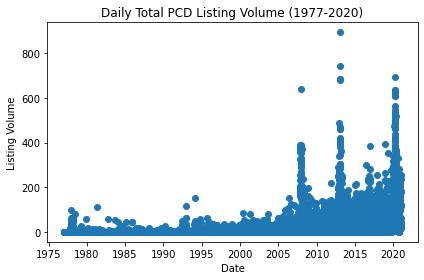

In [101]:
filt = full_pcd["CREATED_DATE"] < "2021-01-01"
pcd_activity_resampling_plot(full_pcd[filt], "D", "Daily Total PCD Listing Volume (1977-2020)")

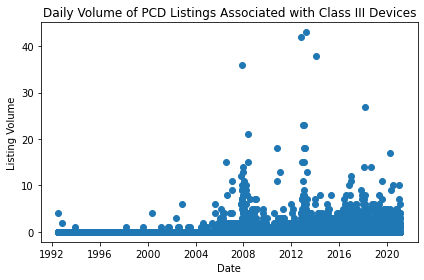

In [102]:
pcd_activity_plot(dev_pcd, "D", "Daily Volume of PCD Listings Associated with Class III Devices")

**Cumulative Total of Most Popular Device PCD Listings**

In [64]:
def pcd_activity_popular(pcd_df, title, firm_data=False):
    # Extract Data
    if firm_data is True:
        pcd_counter = Counter(pcd_df["FIRM_NAME"])
    else:
        pcd_counter = Counter(pcd_df["PRODUCT_CODE"])
    code_list = [x[0] for x in pcd_counter.most_common(10)]

    data = {}

    for code in code_list:
        if firm_data is True:
            temp_df = pcd_df.loc[pcd_df["FIRM_NAME"] == code]
        else:
            temp_df = pcd_df.loc[pcd_df["PRODUCT_CODE"] == code]
        temp_df = temp_df.sort_values(by="CREATED_DATE").reset_index(drop=True)
        x = []
        y = []
        for i,row in temp_df.iterrows():
            x.append(row[2])
            y.append(i)
            data[code] = (x,y)
    
    # Create Plot
    plt.figure(figsize=(8,5))
    for code in data:
        plt.plot(data[code][0], data[code][1], label=code)

    plt.title(title)
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("Total Listings")

    if firm_data is True:
        plt.legend(loc=[0, -0.70])
    else:
        plt.legend()
    plt.show()

    # Print Key
    if firm_data is False:
        print_device_code_key(code_list, raw_product_code=raw_product_code)

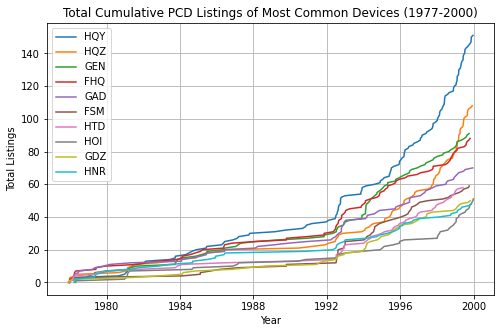

HQY:Sunglasses (Non-Prescription Including Photosensitive)
HQZ:Frame, Spectacle
GEN:Forceps, General & Plastic Surgery
FHQ:Holder, Needle, Gastroenterologic
GAD:Retractor
FSM:Tray, Surgical, Instrument
HTD:Forceps
HOI:Spectacle, Magnifying
GDZ:Handle, Scalpel
HNR:Forceps, Ophthalmic


In [73]:
pcd_activity_popular(full_pcd.loc[full_pcd["CREATED_DATE"] < datetime(2000, 1, 1)], 
                     "Total Cumulative PCD Listings of Most Common Devices (1977-2000)",
                     firm_data=False)

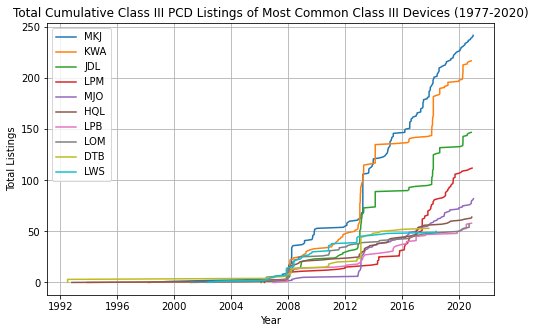

MKJ: Automated External Defibrillators (Non-Wearable)
KWA: Prosthesis, Hip, Semi-Constrained (Metal Uncemented Acetabular Component)
JDL: Prosthesis, Hip, Semi-Constrained (Metal Cemented Acetabular Component)
LPM: Lenses, Soft Contact, Extended Wear
MJO: Prosthesis, Intervertebral Disc
HQL: Intraocular Lens
LPB: Cardiac Ablation Percutaneous Catheter
LOM: Test, Hepatitis B (B Core, Be Antigen, Be Antibody, B Core Igm)
DTB: Permanent Pacemaker Electrode
LWS: Implantable Cardioverter Defibrillator (Non-Crt)


In [70]:
pcd_activity_popular(pcd.loc[full_pcd["CREATED_DATE"] < datetime(2021, 1, 1)], "Total Cumulative Class III PCD Listings of Most Common Class III Devices (1977-2020)",
                     firm_data=False)

**Company Activity**

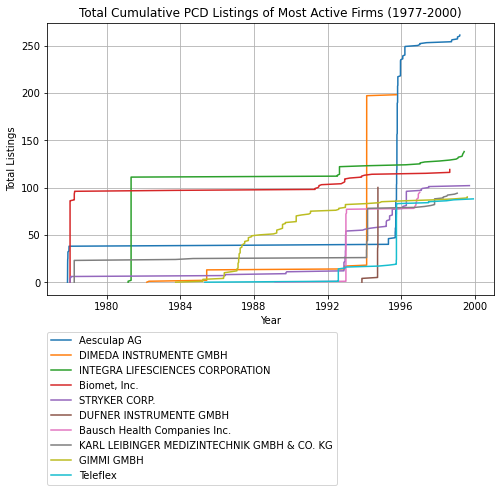

In [ ]:
pcd_activity_popular(full_pcd.loc[full_pcd["CREATED_DATE"] < datetime(2000, 1, 1)], 
                     "Total Cumulative PCD Listings of Most Active Firms (1977-2000)",
                     firm_data=True, raw_product_code=raw_product_code)

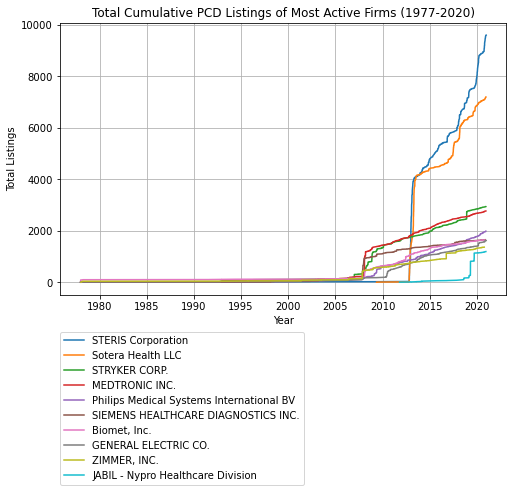

In [73]:
pcd_activity_popular(full_pcd.loc[full_pcd["CREATED_DATE"] < datetime(2021, 1, 1)], "Total Cumulative PCD Listings of Most Active Firms (1977-2020)",
                     firm_data=True)

## PMA Anylsis

Interesting to note that the device PMA's include things that I would classify as biologics and not "devices," like monocolonal antibody treatments and PCR tests for gene mutations (ex: "VENTANA PD-L1 (SP142) Assay" and "cobas EGFR MUTATION TEST").

In [8]:
# Convertet new table to datetime
# pma = raw_pma
# pma["DATERECEIVED"] = pd["DATERECEIVED"], format="%m/%d/%Y")
# pma["DECISIONDATE"] = pd.to_datetime(pma["DECISIONDATE"], format="%m/%d/%Y")

#TODO Use regex to standardize names (ex: remove inc., llc)

In [75]:
def pma_activity_popular(pma_df, title, firm_data=False):
    # Extract Data
    if firm_data is True:
        pma_counter = Counter(pma_df["APPLICANT"])
    else:
        pma_counter = Counter(pma_df["PRODUCTCODE"])
    code_list = [x[0] for x in pma_counter.most_common(10)]

    data = {}
    
    

    for code in code_list:
        if firm_data is True:
            temp_df = pma_df.loc[pma_df["APPLICANT"] == code]
        else:
            temp_df = pma_df.loc[pma_df["PRODUCTCODE"] == code]
        temp_df = temp_df.sort_values(by="DATERECEIVED").reset_index(drop=True)
        x = []
        y = []
        for i, row in temp_df.iterrows():
            x.append(row[16]) # DATERECEIVED
            y.append(i)
            data[code] = (x,y)
    
    # Create Plot
    plt.figure(figsize=(8,5))
    for code in data:
        plt.plot(data[code][0], data[code][1], label=code)

    plt.title(title)
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("Total Approvals")

    if firm_data is True:
        plt.legend(loc=[0, -0.70])
    else:
        plt.legend()
    plt.show()

    # Print Key Key
    if firm_data is False:
        print_device_code_key(code_list, raw_product_code=raw_product_code)

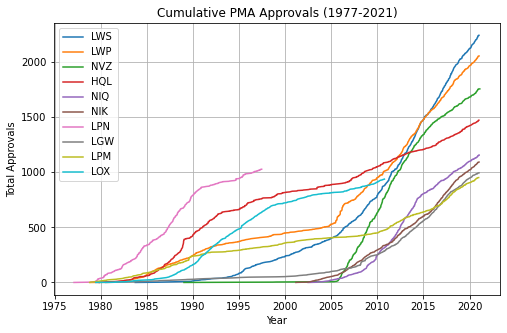

LWS: Implantable Cardioverter Defibrillator (Non-Crt)
LWP: Implantable Pulse Generator, Pacemaker (Non-Crt)
NVZ: Pulse Generator, Permanent, Implantable
HQL: Intraocular Lens
NIQ: Coronary Drug-Eluting Stent
NIK: Defibrillator, Automatic Implantable Cardioverter, With Cardiac Resynchronization (Crt-D)
LPN: Accessories, Soft Lens Products
LGW: Stimulator, Spinal-Cord, Totally Implanted For Pain Relief
LPM: Lenses, Soft Contact, Extended Wear
LOX: Catheters, Transluminal Coronary Angioplasty, Percutaneous


In [79]:
pma_activity_popular(raw_pma.loc[raw_pma["DATERECEIVED"] > datetime(1977, 1, 1)], 
                     "Cumulative PMA Approvals (1977-2021)",
                     firm_data=False)

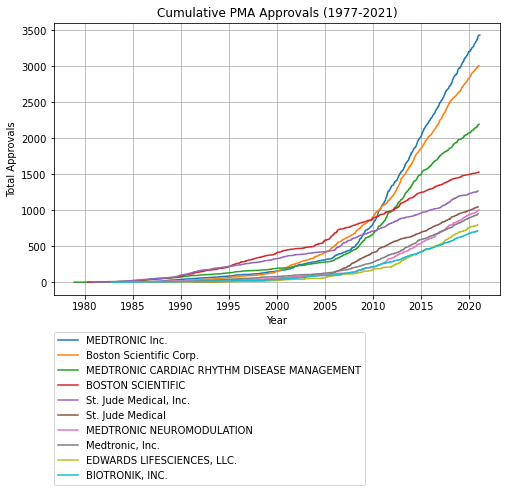

In [80]:
pma_activity_popular(raw_pma.loc[raw_pma["DATERECEIVED"] > datetime(1977, 1, 1)], 
                     "Cumulative PMA Approvals (1977-2021)",
                     firm_data=True)

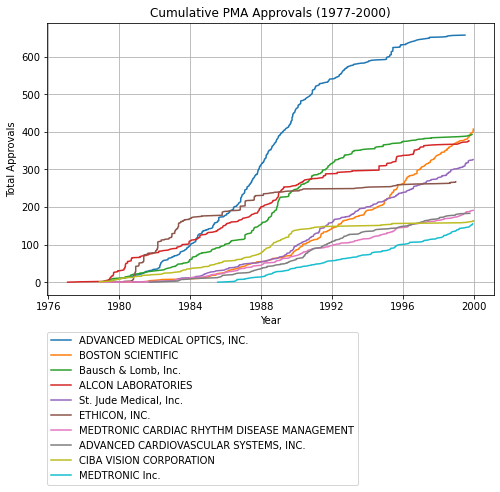

In [82]:
pma_activity_popular(raw_pma.loc[raw_pma.DATERECEIVED.between(datetime(1977, 1, 1), datetime(2000, 1, 1))], 
                     "Cumulative PMA Approvals (1977-2000)",
                     firm_data=True)

## Correlation Analysis

In [91]:
values = [item.lower() for item in ["VSHIP", "MATCOST", "VADD", "INVEST"]]
value_corrections = [item.lower() for item in ["PISHIP", "PIMAT", "PIINV", "PIEN"]]

In [93]:
raw_pma.head()

,PMANUMBER,SUPPLEMENTNUMBER,APPLICANT,STREET_1,STREET_2,CITY,STATE,ZIP,ZIP_EXT,GENERICNAME,...,ADVISORYCOMMITTEE,SUPPLEMENTTYPE,SUPPLEMENTREASON,REVIEWGRANTEDYN,DATERECEIVED,DECISIONDATE,DOCKETNUMBER,FEDREGNOTICEDATE,DECISIONCODE,AOSTATEMENT
0,P160006,NaN,"VENTANA MEDICAL SYSTEMS, INC.",1910 EAST INNOVATION PARK DR.,NaN,TUCSON,AZ,85755,NaN,"Immunohistochemistry assay, antibody, programm...",...,PA,NaN,NaN,Y,2016-02-22,2016-10-18,16M-3431,11/15/2016,APCB,Approval for the VENTANA PD-L1 (SP142) Assay. ...
1,P150047,NaN,"Roche Molecular Systems, Inc.",4300 Hacienda Drive,NaN,Pleasanton,CA,94588,2722,Somatic gene mutation detection system,...,PA,NaN,NaN,Y,2015-12-09,2016-06-01,16M-1459,06/06/2016,APCB,Approval for the cobas� EGFR Mutation Test v2 ...
2,P150044,NaN,"Roche Molecular Systems, Inc.",4300 Hacienda Drive,NaN,Pleasanton,CA,94588,2722,Somatic gene mutation detection system,...,PA,NaN,NaN,Y,2015-11-23,2016-09-28,16M-2973,10/10/2016,APCB,The cobas� EGFR Mutation Test v2 is a real-tim...
3,P150027,NaN,"DAKO NORTH AMERICA, INC.",6392 VIA REAL,NaN,CARPINTERIA,CA,93013,NaN,"Immunohistochemistry assay, antibody, programm...",...,PA,NaN,NaN,N,2015-08-04,2016-01-23,16M-0803,03/03/2016,APCB,APPROVAL FOR THE PD-L1 IHC 28-8 PHARMDX. THIS ...
4,P940022,NaN,ADVANCED BIONICS CORP.,12740 SAN FERNANDO RD.,NaN,SYLMAR,CA,91342,NaN,"Implant, cochlear",...,EN,NaN,NaN,N,1994-06-30,1996-03-22,96M-0490,12/27/1996,APCB,APPROVAL FOR THE CLARION MULTI-STRATEGY COCHLE...


In [120]:
def plot_pma_ratio(value, value_correction, pma=raw_pma, device_df=device_df):
    cor_pma = pma.loc[pma.DATERECEIVED.between(datetime(1980, 1, 1), datetime(2012, 1, 1))]
    
    year_range = list(range(1980,2013))
    years= list(range(1980,2012))
    
    cor_pma.set_index("DATERECEIVED", inplace=True)
    pma_y = cor_pma.resample("AS").agg(lambda x: len(x["PMANUMBER"])).values  # Total number of PMAs in a year
            
    cor_devicedf = device_df.loc[device_df["year"].isin(range(1980,2012))].reset_index()
    new_vals = cor_devicedf[value] / cor_devicedf[value_correction]
    cor_devicedf["new_vals"] = new_vals.values
    
    cor_dev_grp = cor_devicedf.groupby("year")
    device_y = []
    for i in year_range:
        if i == year_range[-1]:
            break
        else:
            device_y.append(cor_dev_grp.get_group(i)["new_vals"].sum())
    
    plt.scatter(years, (np.array(device_y)/np.array(pma_y)))
    plt.title("Ratio of {} to Number of PMAs".format(value.upper()))
    plt.show()

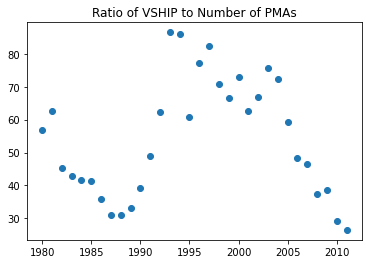

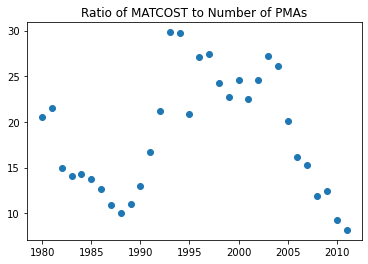

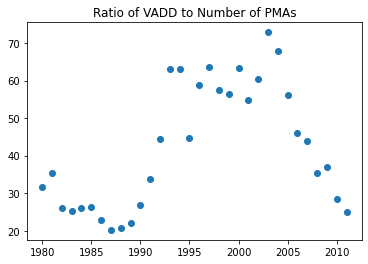

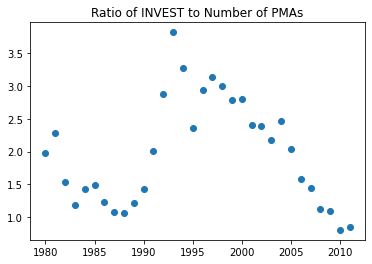

In [121]:
for i, item in enumerate(values):
    plot_pma_ratio(item, value_corrections[i])